In [1]:
from basata import basata

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use("classic")
sns.set(style ='darkgrid')
random_seed_val = 100

In [2]:
help(basata)

Help on class basata in module basata:

class basata(builtins.object)
 |  Basata is the arabic word for simplicity
 |  The code might not be simple, but the implementation is.
 |  
 |  Methods defined here:
 |  
 |  FID(self, DataFrame, ML_model, plot=True, length=5, height=5)
 |      Function for creating a Feature Importance Dataframe (FID) and plotting it
 |      Only models with a feature_importances_ attribute are supported
 |  
 |  compare_classification(self, X_train, y_train)
 |      Function for comparing feature importance of different classification models
 |      Only models with a feature_importances_ attribute are supported
 |  
 |  eval(self, X_test, X_train, y_train, y_test, random_seed=None, classification=True)
 |      Function for evaluating classification models using accuracy, precision, recall, F1, ROC and PRC
 |  
 |  null(self, DataFrame)
 |      The null method gives you insight to number of null values
 |  
 |  tuning(self, X_train, y_train, model='rf', GridSe

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


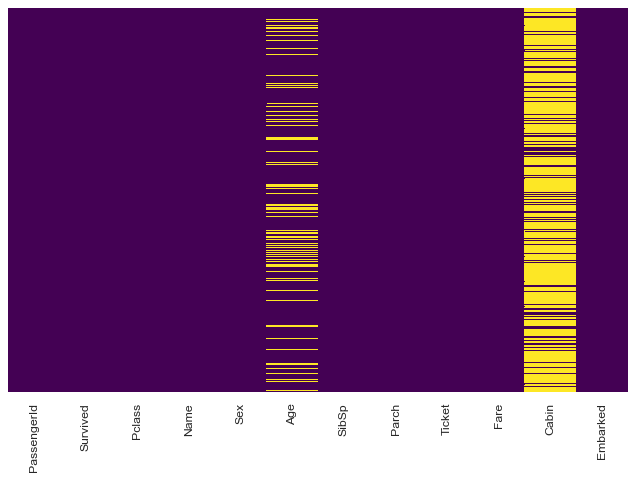

In [6]:
basata().null(df)

#### Train-Test Split

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
from sklearn.model_selection import train_test_split

X = df.loc[:,['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]

y = df.loc[:,['Survived']]

random_seed_val = 100

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed_val, stratify=y)


#### Preprocess

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(imputation_order='ascending', max_iter=10, random_state=random_seed_val, n_nearest_features=None)

def preprocess(DataFrame):
    DataFrame.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
    DataFrame = pd.get_dummies(DataFrame, columns=['Pclass', 'Sex', 'Embarked'], drop_first=False)

    column = DataFrame.columns
    DataFrame = pd.DataFrame(imputer.fit_transform(DataFrame), columns = column)
    DataFrame['Age'] = np.round(DataFrame['Age'].values).astype('int64')

    return DataFrame

X_train = preprocess(X_train)

/Users/family/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
X_train.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,71,0.0,0.0,34.6542,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,16,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,26,0.0,0.0,7.8958,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,30,0.0,0.0,7.2292,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,29,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


#### Feature importance

,feature,feature_importance
0,Age,0.269200
1,Fare,0.252228
2,Sex_male,0.135501
3,Sex_female,0.120445
4,SibSp,0.048851


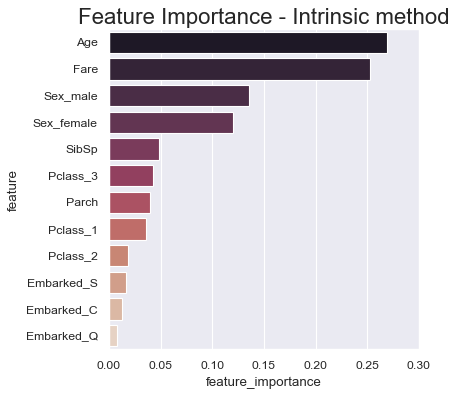

In [12]:
# random forest for feature importance on a classification problem
from sklearn.ensemble import RandomForestClassifier

# define the model
rf = RandomForestClassifier(n_jobs=-1, random_state=5)

# fit the model
rf.fit(X_train, y_train)

#Create table
rf_imp = basata().FID(X_train, rf)
rf_imp.head()

In [13]:
basata().compare_classification(X_train, y_train)

,Random Forest,Gradient Boosting,AdaBoost,Decision Tree
0,Fare,Sex_male,Age,Sex_male
1,Age,Age,Fare,Age
2,Sex_female,Sex_female,SibSp,Fare
3,Sex_male,Fare,Sex_male,Pclass_3
4,Pclass_3,Pclass_3,Parch,SibSp
5,SibSp,Pclass_1,Pclass_1,Pclass_1
6,Parch,SibSp,Pclass_3,Embarked_S
7,Pclass_1,Embarked_S,Sex_female,Parch
8,Embarked_S,Parch,Embarked_S,Pclass_2
9,Pclass_2,Pclass_2,Pclass_2,Embarked_Q


#### Model Training

In [14]:
X_test = preprocess(X_test)

/Users/family/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


/Users/family/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
ROC curves: 100%|██████████| 7/7 [00:00<00:00, 955.76it/s]


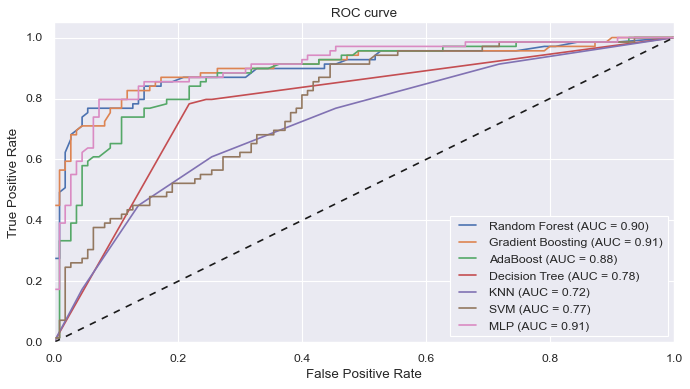

Precision Recall Curve: 100%|██████████| 7/7 [00:00<00:00, 28.04it/s]


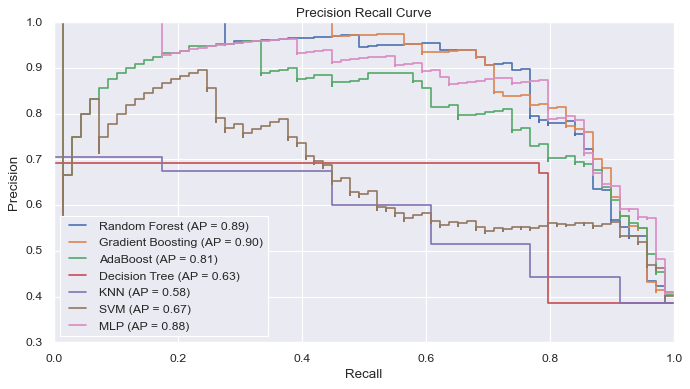

,Accuracy,Recall,Precision,F1
Random Forest,0.843575,0.826087,0.780822,0.802817
Gradient Boosting,0.837989,0.826087,0.770270,0.797203
MLP,0.832402,0.855072,0.746835,0.797297
AdaBoost,0.798883,0.840580,0.698795,0.763158
Decision Tree,0.782123,0.782609,0.692308,0.734694
KNN,0.692737,0.608696,0.600000,0.604317
SVM,0.670391,0.913043,0.543103,0.681081


In [15]:
basata().eval(X_test, X_train, y_train, y_test, 100)

#### Tuning

In [16]:
rf_final = basata().tuning(X_train, y_train, GridSearch=False)

The RandomizedSearchCV found the following best parameters:
Best score for rf: 0.81350790513834
Best estimator for rf: RandomForestClassifier(max_depth=8, max_features='log2', min_samples_leaf=10,
                       min_samples_split=10, n_estimators=500, n_jobs=-1)


In [17]:
X = preprocess(X)

#rf_final = RandomForestClassifier(max_depth=1, max_features='sqrt', min_samples_leaf=4, min_samples_split=10, n_estimators=10, n_jobs=-1)
rf_final.fit(X, y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200,
                                                         500]},
                   scoring=make_scorer(precision_score))

In [18]:
df_test = pd.read_csv("test.csv")

In [19]:
XX = preprocess(df_test)

In [20]:
result = np.array([rf_final.predict(XX)])

In [21]:
df_test = pd.read_csv("test.csv")

c = ["Survived"]
df_submission = pd.DataFrame(result)
df_submission = df_submission.T
df_submission.columns = c
df_submission.head()
df_submission = pd.concat([df_test.PassengerId, df_submission], axis=1, ignore_index=False)


In [22]:
df_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [23]:
df_submission.to_csv("final.csv", index_label=False, index=False)